# Oefeningen Decision Trees

Vergelijk twee beslissingsbomen met een andere random state voor de Wine dataset. Wat is je conclusie over de mate waarin je kunt voorspellen hoe een decision tree zich gedraagt ? Maak een visualisatie van de eerste twee features en toon de decision boundaries voor elk van de twee bomen. Breng voor alle duidelijkheid ook verandering aan in je train-test split, gebruik ook hier een verschillende seed!

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
import pydot

# Load the wine dataset
wine = load_wine()
x = wine.data
y = wine.target
#standardscaler toepassen!
scaler = StandardScaler()
x_scl = scaler.fit_transform(x)

# Split the dataset 
x_trn1, x_tst1, y_trn1, y_tst1 = train_test_split(x_scl,y, test_size=0.2, random_state = 1)
x_trn2, x_tst2, y_trn2, y_tst2 = train_test_split(x_scl,y, test_size=0.2, random_state = 2)


depth = 2
# Eerste decision tree
classifier1 = DecisionTreeClassifier(max_depth=depth)
classifier1.fit(x_trn1, y_trn1)
export_graphviz(
    classifier1,
    out_file="wine1.dot",
    feature_names=wine.feature_names,
    class_names=wine.target_names,
    rounded=True,
    filled=True
)
graph = pydot.graph_from_dot_file("wine1.dot")[0] 
graph.write_svg("wine1.svg")



# Tweede decision tree
classifier2 = DecisionTreeClassifier(max_depth=depth)
classifier2.fit(x_trn2, y_trn2)
export_graphviz(
    classifier2,
    out_file="wine2.dot",
    feature_names=wine.feature_names,
    class_names=wine.target_names,
    rounded=True,
    filled=True
)

graph = pydot.graph_from_dot_file("wine2.dot")[0] 
graph.write_svg("wine2.svg")

Je kan van sklearn.tree de methode plot_tree importeren. Daar kan je een getraind model aan meegeven en de feature names en class names, en dan wordt er snel een mooie visualisatie gemaakt.

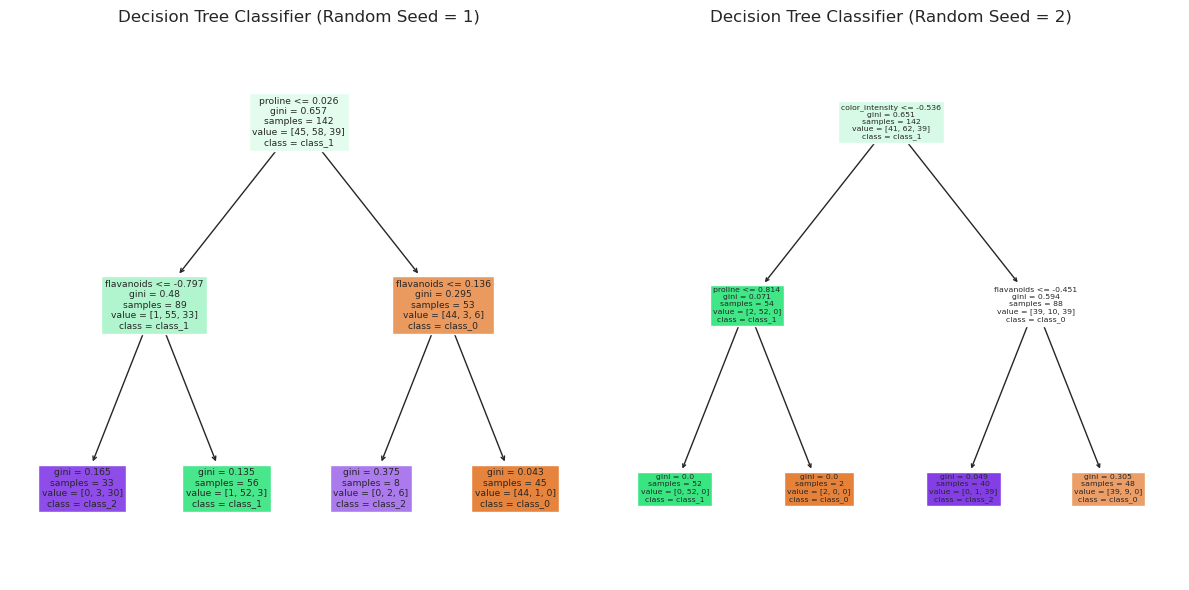

In [2]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# We maken een prentje om ze naast ear weer te geven
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_tree(classifier1, feature_names=wine.feature_names, class_names=list(wine.target_names), filled=True)
plt.title("Decision Tree Classifier (Random Seed = 1)")

plt.subplot(1, 2, 2)
plot_tree(classifier2, feature_names=wine.feature_names, class_names=list(wine.target_names), filled=True)
plt.title("Decision Tree Classifier (Random Seed = 2)")

plt.tight_layout()
plt.show()

Maak nu een simpeler model met enkel de eerste twee features van de dataset. Plot de decision boundary voor deze figuren (ChatGPT toegelaten voor plots).

## Voting classifier
Implementeer een voting classifier met verschillende onderliggende estimators en vergelijk de performantie met 1 enkele decision tree. Gebruik Breast Cancer dataset.

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [4]:
# Inladen dataset
breast_cancer = load_breast_cancer()

x = breast_cancer.data
y = breast_cancer.target

In [5]:
#Splitten in train-test
x_trn, x_tst, y_trn, y_tst = train_test_split(x,y, test_size=0.2, random_state = 10)

In [6]:
# creëer individuele indentifiers zoals decision tree, svm, KNN
svm = SVC(probability=True)
knn = KNeighborsClassifier(n_neighbors=3)
tree = DecisionTreeClassifier()

In [7]:
# creeër voting classifier, met soft voting
clf = VotingClassifier(estimators=[('svm', svm), ('knn', knn), ('tree', tree)], voting='hard')

In [8]:
# Training
clf.fit(x_trn, y_trn)

VotingClassifier(estimators=[('svm', SVC(probability=True)),
                             ('knn', KNeighborsClassifier(n_neighbors=3)),
                             ('tree', DecisionTreeClassifier())])

In [9]:
# Evaluatie
y_pred = clf.predict(x_tst)
accuracy = accuracy_score(y_tst, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9385964912280702


In [10]:
# Pas nu de classifier aan voor soft voting
clf = VotingClassifier(estimators=[('svm', svm), ('knn', knn), ('tree', tree)], voting='soft')
clf.fit(x_trn, y_trn)
y_pred = clf.predict(x_tst)
accuracy = accuracy_score(y_tst, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9473684210526315


In [11]:
# Bekijk ook de individuele performantie van de onderliggende classifiers (kleine for loop over individual_estimators)
named_estimators = clf.named_estimators_
for estimator_name in named_estimators:
    y_pred = named_estimators[estimator_name].predict(x_tst)
    accuracy = accuracy_score(y_tst, y_pred)
    print(f'Accuracy van {estimator_name}: {accuracy}')

Accuracy van svm: 0.9210526315789473
Accuracy van knn: 0.9210526315789473
Accuracy van tree: 0.9122807017543859


In [12]:
individual_estimators = [knn, tree, svm]
for estimator in individual_estimators:
    estimator.fit(x_trn, y_trn)
    y_pred = estimator.predict(x_tst)
    accuracy = accuracy_score(y_tst, y_pred)
    print(f"Accuracy of {estimator.__class__.__name__}: {accuracy:.4f}")

Accuracy of KNeighborsClassifier: 0.9211
Accuracy of DecisionTreeClassifier: 0.9298
Accuracy of SVC: 0.9211


## Bagging

Gebruik opnieuw de Wine dataset.

In [13]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [14]:
# data inladen
wine = load_wine()
x = wine.data
y = wine.target

In [15]:
#split data
x_trn, x_tst, y_trn, y_tst = train_test_split(x_scl,y, test_size=0.2, random_state = 1)

In [16]:
# bagging met 100 bomen
tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=100)

In [17]:
# trainen
bagging_clf.fit(x_trn, y_trn)

/home/jurrean/miniconda3/envs/ml_algorithms_env/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [18]:
# vergelijk met 1 enkele boom
single_tree = DecisionTreeClassifier()
single_tree.fit(x_trn, y_trn)
y_pred_single_tree = single_tree.predict(x_tst)
y_pred_bagging = bagging_clf.predict(x_tst)

In [19]:
#vergelijk de accuracy scores
accuracy_single_tree = accuracy_score(y_tst, y_pred_single_tree)
accuracy_bagging = accuracy_score(y_tst, y_pred_bagging)

print(f'Accuracy van enkele boom: {accuracy_single_tree}')
print(f'Accuracy van bagging classifier: {accuracy_bagging}')

Accuracy van enkele boom: 0.8611111111111112
Accuracy van bagging classifier: 0.9444444444444444


## AdaBoost vs XGBoost
Vergelijk Adaboost en XGBoost toegepast op de Titanic dataset die we in een eerder labo al hebben gebruikt. We gebruiken voor elke classifier 100 onderliggende estimators.

Data voorbereiding:

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [21]:
# data inladen
tit_df = pd.read_csv("data/titanic_dataset.csv")
tit_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [22]:
# data cleansing, deze data heeft nog wat werk nodig
# je mag de kolommen passengerID, name, ticket en cabin verwijderen
tit_df.drop(columns=['PassengerId', 'Name','Ticket','Cabin'], inplace=True)
tit_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [23]:
# Omgaan met missing values voor de Age kolommen.
# Categorische features encoderen
imputer = SimpleImputer(strategy='mean')
tit_df['Age'] = imputer.fit_transform(tit_df[['Age']])

le = LabelEncoder()
tit_df['Embarked'] = le.fit_transform(tit_df['Embarked'].astype(str))
tit_df['Sex'] = le.fit_transform(tit_df['Sex'])

tit_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [24]:
# X en y bepalen uit deze dataset. We willen voorspellen wie de ramp heeft overleefd
X = tit_df.drop(columns=['Survived'])
y = tit_df['Survived']

We maken een visualisatie om wat feeling te krijgen voor deze dataset met Seaborn, pairplot van de feature. Seaborn is een andere library die verderbouwt op matplotlib en ook heel populair is. Deze kan je best ook installeren in je conda omgeving.

/home/jurrean/miniconda3/envs/ml_algorithms_env/lib/python3.11/site-packages/seaborn/axisgrid.py:1609: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/home/jurrean/miniconda3/envs/ml_algorithms_env/lib/python3.11/site-packages/seaborn/axisgrid.py:1609: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/home/jurrean/miniconda3/envs/ml_algorithms_env/lib/python3.11/site-packages/seaborn/axisgrid.py:1609: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/home/jurrean/miniconda3/envs/ml_algorithms_env/lib/python3.11/site-packages/seaborn/axisgrid.py:1609: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/home/jurrean/miniconda3/envs/ml_algorithms_env/lib/python3.11/site-packages/seaborn/axisgrid.py:1609: U

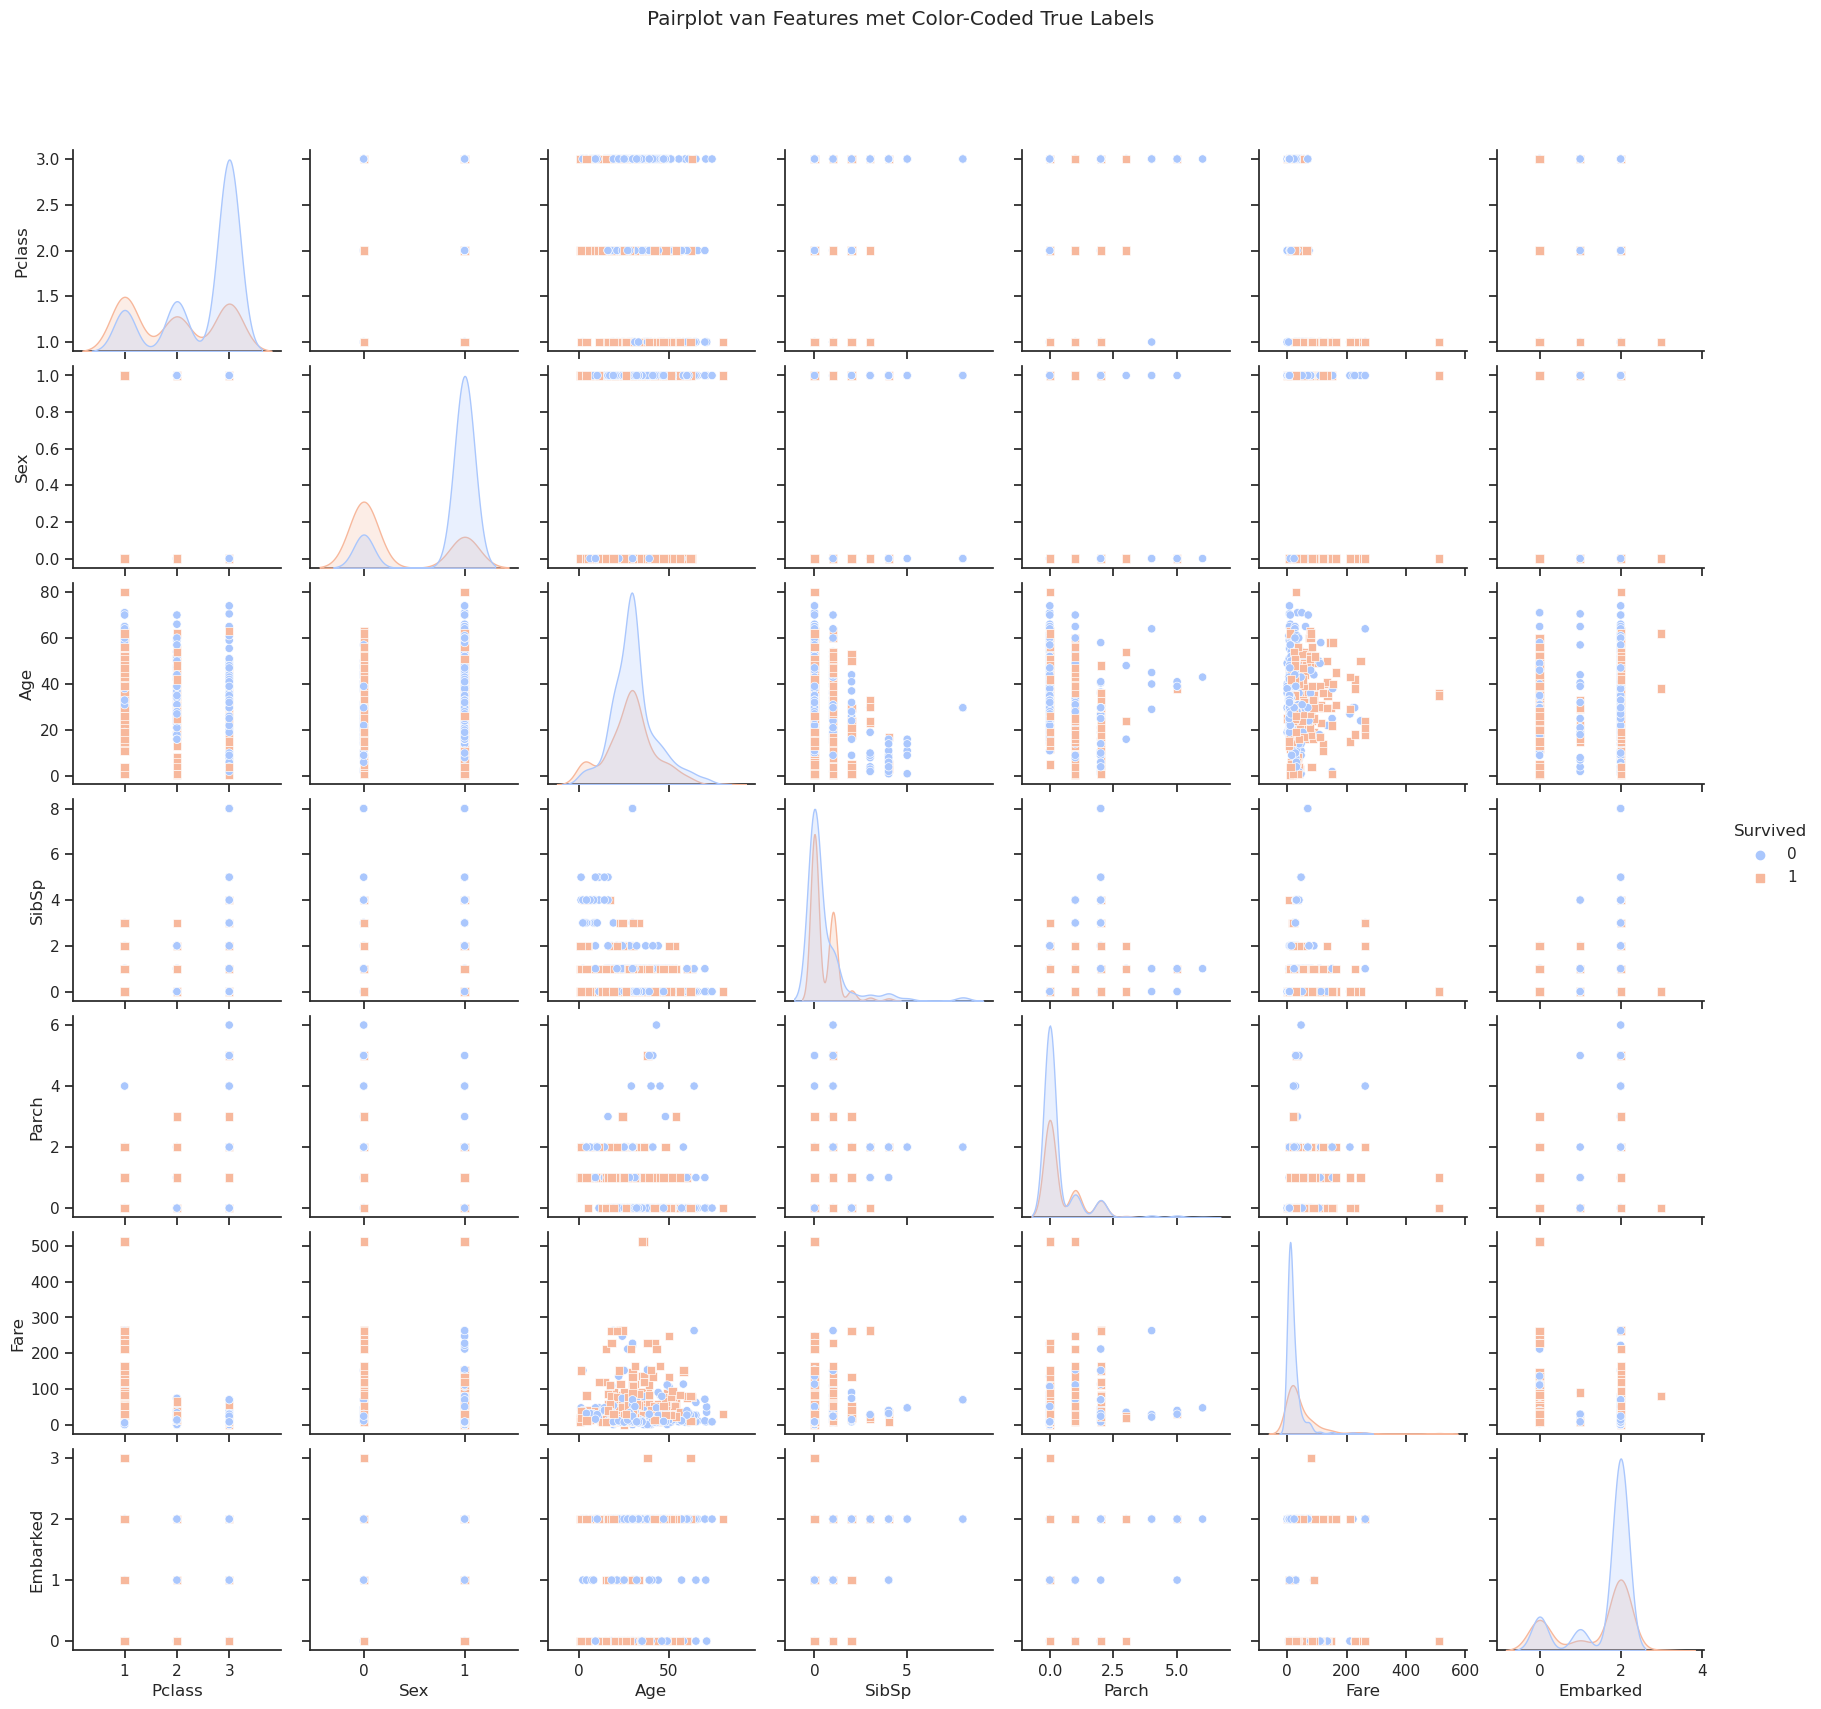

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

predictions_df = pd.concat([X, y], axis=1)

# Pairplot, kan inzicht geven over hoe de data zich gedraagt
sns.set(style='ticks')
sns.pairplot(predictions_df, hue='Survived', palette='coolwarm', markers=["o", "s", "D"])
plt.suptitle('Pairplot van Features met Color-Coded True Labels')
plt.subplots_adjust(top=0.9)
plt.show()

### Adaboost

In [26]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [27]:
# adaboost model trainen
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 1)
adaboost = AdaBoostClassifier()
adaboost.fit(x_train, y_train)

AdaBoostClassifier()

In [28]:
# voorspellingen maken op testdata
y_pred_ada = adaboost.predict(x_test)

In [29]:
# uitgebreide evaluatiemetrieken
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada)
recall_ada = recall_score(y_test, y_pred_ada)
f1_ada = f1_score(y_test, y_pred_ada)
confusion_ada = confusion_matrix(y_test, y_pred_ada)

print("AdaBoost Classifier metrieken:")
print(f"Accuracy: {accuracy_ada:.2f}")
print(f"Precision: {precision_ada:.2f}")
print(f"Recall: {recall_ada:.2f}")
print(f"F1 Score: {f1_ada:.2f}")
print("Confusion Matrix:")
print(confusion_ada)

AdaBoost Classifier metrieken:
Accuracy: 0.78
Precision: 0.75
Recall: 0.67
F1 Score: 0.71
Confusion Matrix:
[[90 16]
 [24 49]]


### XGBoost

In [30]:
#importeer de classifier. Mogelijk moet je conda omgeving aanpassen door XGBoost te installeren
import xgboost

In [31]:
# model aanmaken en fitten
xgboost = xgboost.XGBClassifier()
xgboost.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [32]:
# predicties maken
y_pred_xgb = xgboost.predict(x_test)

In [33]:
# uitgebreide scoringsmetrieken
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
confusion_xgb = confusion_matrix(y_test, y_pred_xgb)

print("\nXGBoost Classifier Metrics:")
print(f"Accuracy: {accuracy_xgb:.2f}")
print(f"Precision: {precision_xgb:.2f}")
print(f"Recall: {recall_xgb:.2f}")
print(f"F1 Score: {f1_xgb:.2f}")
print("Confusion Matrix:")
print(confusion_xgb)


XGBoost Classifier Metrics:
Accuracy: 0.77
Precision: 0.81
Recall: 0.58
F1 Score: 0.67
Confusion Matrix:
[[96 10]
 [31 42]]
